# 集成算法实例
https://blog.csdn.net/u012735708/article/details/82682673

深度学习常用的训练数据集介绍以及下载：https://blog.csdn.net/qq_27825451/article/details/89309175

# 数据载入

In [1]:
# 导入科学计算库
import numpy as np
# 导入数据处理库
import pandas as pd
# 导入画图，可视化展示的库
import matplotlib.pyplot as plt
%matplotlib inline

# 进行随机切分时，训练集，测试集，要设置随机种子
seed = 222
np.random.seed(seed)

# 读进来数据集
# 数据载入
df = pd.read_csv('./data/csv/2012_Federal_Election_Commission_Database.csv')
df.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [2]:
# 查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 7 columns):
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_st            1001727 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


In [3]:

# 用统计学指标快速描述数据的概要
df.describe()

,contb_receipt_amt
count,1.001731e+06
mean,2.982352e+02
std,3.749667e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


# 数据处理，清洗

In [4]:
# 数据处理，清洗

# 填充缺失值
# 从data.info()可以明显看出contbr_employer、contbr_occupation含有大量的缺失值。所以对缺失的值进行填充。将其填充为NONE。
df['contbr_employer'].fillna('NONE',inplace = True)
df['contbr_occupation'].fillna('NONE',inplace = True)

# 查看每一个数据的信息，包括字段名称，非空数量，字段数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 7 columns):
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_st            1001727 non-null object
contbr_employer      1001731 non-null object
contbr_occupation    1001731 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


In [5]:
# 统计候选人，通过候选人cand_nm来统计候选人，并最后找出这些候选人的党派。
print("参加候选的有{0}位候选人，分别是：".format(len((df['cand_nm']).unique())))
print((df['cand_nm']).unique())

参加候选的有13位候选人，分别是：
['Bachmann, Michelle' 'Romney, Mitt' 'Obama, Barack'
 "Roemer, Charles E. 'Buddy' III" 'Pawlenty, Timothy' 'Johnson, Gary Earl'
 'Paul, Ron' 'Santorum, Rick' 'Cain, Herman' 'Gingrich, Newt'
 'McCotter, Thaddeus G' 'Huntsman, Jon' 'Perry, Rick']


In [6]:
#建立字典parties，键：候选人姓名；值：候选人党派
party = {
    'Bachmann, Michelle': 'Rep',
           'Cain, Herman': 'Rep',
           'Gingrich, Newt': 'Rep',
           'Huntsman, Jon': 'Rep',
           'Johnson, Gary Earl': 'Rep',
           'McCotter, Thaddeus G': 'Rep',
           'Obama, Barack': 'Dem',
           'Paul, Ron': 'Rep',
           'Pawlenty, Timothy': 'Rep',
           'Perry, Rick': 'Rep',
           "Roemer, Charles E. 'Buddy' III": 'Rep',
           'Romney, Mitt': 'Rep',
           'Santorum, Rick': 'Rep'
}

In [7]:
# 利用map() 函数，向数据中增加一列党派party
df['party'] = df['cand_nm'].map(party)
df['party'].value_counts()

Dem    593746
Rep    407985
Name: party, dtype: int64

In [8]:
df.head(10)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Rep
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Rep
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Rep
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Rep
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Rep
5,"Bachmann, Michelle","BECKMAN, JAMES",AR,NONE,RETIRED,500.0,23-JUN-11,Rep
6,"Bachmann, Michelle","BLEVINS, DARONDA",AR,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,Rep
7,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,05-JUL-11,Rep
8,"Bachmann, Michelle","COLLINS, SARAH",AZ,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,Rep
9,"Bachmann, Michelle","COLEMAN, RONALD",AZ,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,Rep


In [9]:
# 按职业汇总对赞助金额进行排序
df.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending = False)[:30]

contbr_occupation
RETIRED                                   48176447.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NONE                                       4697668.53
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [10]:
# 很多职业重复出现
# 建立一个职业对应字典，接下来把相同职业的不同格式合并在一起。

occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}
# 如果不在字典中,返回x
# lamda 特殊运算符：能够以表达式的方式创建一个匿名函数 ：lamda args(参数列表):expression(参数进行运算的表达式)
# 此处创建了匿名函数 : f()
f = lambda x: occupation_map.get(x, x)
df.contbr_occupation = df.contbr_occupation.map(f)

# print(f)   <function <lambda> at 0x000002B4BB50A7B8>

print(df.contbr_occupation)

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
5                               RETIRED
6                          NOT PROVIDED
7                               RETIRED
8                                    RN
9                   ELECTRICAL ENGINEER
10                              RETIRED
11                       LAND DEVELOPER
12                         NOT PROVIDED
13                         NOT PROVIDED
14                         NOT PROVIDED
15                            PHYSICIAN
16                              RETIRED
17                              RETIRED
18                              RETIRED
19                              RETIRED
20              OFFICE FURNITURE BROKER
21                              RETIRED
22                              MANAGER
23                              MANAGER
24                              RETIRED


In [12]:
# 同上模仿对职业信息转换，对雇主信息进行类似转换

# 同样地，对雇主信息进行类似转换
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
}
# 如果不在字典中,返回x
f = lambda x: emp_mapping.get(x, x)
df.contbr_employer = df.contbr_employer.map(f)

# 数据筛选

In [13]:
#对赞助金额筛选，限定条件（赞助金额必须大于0）

data = df[df['contb_receipt_amt'] > 0]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 8 columns):
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_st            991471 non-null object
contbr_employer      991475 non-null object
contbr_occupation    991475 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
party                991475 non-null object
dtypes: float64(1), object(7)
memory usage: 68.1+ MB


In [15]:
# 查看各候选人获得的赞助总金额,并进行排序，降序排列
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358774e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030575e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [16]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Rep
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Rep
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,Rep
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Rep
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Rep


In [17]:
# 将赞助最多的二者筛选出来
data_or = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()
print(data_or)

              cand_nm                 contbr_nm contbr_st  \
411      Romney, Mitt        ELDERBAUM, WILLIAM        AA   
412      Romney, Mitt        ELDERBAUM, WILLIAM        AA   
413      Romney, Mitt          CARLSEN, RICHARD        AE   
414      Romney, Mitt            DELUCA, PIERRE        AE   
415      Romney, Mitt          SARGENT, MICHAEL        AE   
416      Romney, Mitt     WILSON, ANDREW C. MR.        AE   
417      Romney, Mitt             GRIFFIS, JOHN        AE   
418      Romney, Mitt          SARGENT, MICHAEL        AE   
419      Romney, Mitt             GRIFFIS, JOHN        AE   
420      Romney, Mitt        DELUCA, PIERRE MR.        AE   
421      Romney, Mitt             CLAUDE, FOUKS        AE   
422      Romney, Mitt             CLAUDE, FOUKS        AE   
423      Romney, Mitt            JONES, BRENDON        AE   
424      Romney, Mitt            KAMMER, DONALD        AE   
425      Romney, Mitt            DELUCA, PIERRE        AE   
426      Romney, Mitt   

- cand_nm – 接受捐赠的候选人姓名
- contbr_nm – 捐赠人姓名
- contbr_st – 捐赠人所在州
- contbr_employer – 捐赠人所在公司
- contbr_occupation – 捐赠人职业
- contb_receipt_amt – 捐赠数额（美元）
- contb_receipt_dt – 收到捐款的日期

In [18]:
print(df.head())
print(df.shape)

              cand_nm           contbr_nm contbr_st contbr_employer  \
0  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
1  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
2  Bachmann, Michelle       SMITH, LANIER        AL    NOT PROVIDED   
3  Bachmann, Michelle    BLEVINS, DARONDA        AR            NONE   
4  Bachmann, Michelle  WARDENBURG, HAROLD        AR            NONE   

  contbr_occupation  contb_receipt_amt contb_receipt_dt party  
0           RETIRED              250.0        20-JUN-11   Rep  
1           RETIRED               50.0        23-JUN-11   Rep  
2      NOT PROVIDED              250.0        05-JUL-11   Rep  
3           RETIRED              250.0        01-AUG-11   Rep  
4           RETIRED              300.0        20-JUN-11   Rep  
(1001731, 8)


In [20]:
# 保存到本地
df.to_csv('./data/csv/input.csv')

 集成的工具包http://ml-ensemble.com/

In [2]:
# 导入科学计算库
import numpy as np
# 导入数据处理库
import pandas as pd
# 导入画图，可视化展示的库
import matplotlib.pyplot as plt
%matplotlib inline

# 进行随机切分时，训练集，测试集，要设置随机种子
seed = 222
np.random.seed(seed)

data = pd.read_csv('./data/csv/input.csv')
data.head()

,Unnamed: 0,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Rep
1,1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Rep
2,2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,Rep
3,3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Rep
4,4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Rep


In [2]:
data = data.drop(['Unnamed: 0'],axis = True)
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Rep
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Rep
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,Rep
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Rep
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Rep


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

seed = 222
np.random.seed(seed)

data = pd.read_csv('./data/csv/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [21]:
def get_train_test(test_size = 0.95):
    # 对我们当前的数据的指标，PARTY 进行转换，将Rep 赋值为1，Dem 赋值为0
    # 对标签进行赋值，
    y = 1 * (data.Sex == "male")
    # 把标签去掉
    X = data.drop(['Sex'],axis = 1)
    X = pd.get_dummies(X,sparse = True)
    # 删除一列中数据都相同的列，没有什么参看价值
    X.drop(X.columns[X.std() == 0],axis = 1,inplace = True)
    return train_test_split(X,y,test_size = test_size,random_state = seed)

xtrain,xtest,ytrain,ytest = get_train_test()

print("\nExample data:")
data.head()


Example data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 导入科学计算库
import numpy as np
# 导入数据处理库
import pandas as pd
# 导入画图，可视化展示的库
import matplotlib.pyplot as plt
%matplotlib inline

# 进行随机切分时，训练集，测试集，要设置随机种子
seed = 222
np.random.seed(seed)

# 因数据集太大，选择一部分，进行处理清洗
data = pd.read_csv('./data/csv/input_01.csv')
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
cand_nm              500000 non-null object
contbr_nm            500000 non-null object
contbr_st            499996 non-null object
contbr_employer      495954 non-null object
contbr_occupation    495917 non-null object
contb_receipt_amt    500000 non-null float64
contb_receipt_dt     500000 non-null object
dtypes: float64(1), object(6)
memory usage: 26.7+ MB


In [4]:
data['contbr_st'].fillna('NONE',inplace = True)
data['contbr_employer'].fillna('NONE',inplace = True)
data['contbr_occupation'].fillna('NONE',inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
cand_nm              500000 non-null object
contbr_nm            500000 non-null object
contbr_st            500000 non-null object
contbr_employer      500000 non-null object
contbr_occupation    500000 non-null object
contb_receipt_amt    500000 non-null float64
contb_receipt_dt     500000 non-null object
dtypes: float64(1), object(6)
memory usage: 26.7+ MB


In [6]:
#建立字典parties，键：候选人姓名；值：候选人党派
Party = {
    'Bachmann, Michelle': 'Rep',
           'Cain, Herman': 'Rep',
           'Gingrich, Newt': 'Rep',
           'Huntsman, Jon': 'Rep',
           'Johnson, Gary Earl': 'Rep',
           'McCotter, Thaddeus G': 'Rep',
           'Obama, Barack': 'Dem',
           'Paul, Ron': 'Rep',
           'Pawlenty, Timothy': 'Rep',
           'Perry, Rick': 'Rep',
           "Roemer, Charles E. 'Buddy' III": 'Rep',
           'Romney, Mitt': 'Rep',
           'Santorum, Rick': 'Rep'
}
# 利用map() 函数，向数据中增加一列党派party
data['Party'] = data['cand_nm'].map(Party)
data['Party'].value_counts()

Dem    392361
Rep    107639
Name: Party, dtype: int64

In [7]:
data.to_csv('./data/csv/input02.csv')

In [8]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11,Rep
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11,Rep
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,Rep
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11,Rep
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11,Rep


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
cand_nm              500000 non-null object
contbr_nm            500000 non-null object
contbr_st            500000 non-null object
contbr_employer      500000 non-null object
contbr_occupation    500000 non-null object
contb_receipt_amt    500000 non-null float64
contb_receipt_dt     500000 non-null object
Party                500000 non-null object
dtypes: float64(1), object(7)
memory usage: 30.5+ MB


In [9]:
# 导入科学计算库
import numpy as np
# 导入数据处理库
import pandas as pd
# 导入画图，可视化展示的库
import matplotlib.pyplot as plt
%matplotlib inline

# 进行随机切分时，训练集，测试集，要设置随机种子
seed = 222
np.random.seed(seed)

# 因数据集太大，选择一部分，进行处理清洗
data = pd.read_csv('./data/csv/input02.csv')
data.head()

,Unnamed: 0,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11,Rep
1,1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11,Rep
2,2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,Rep
3,3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11,Rep
4,4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11,Rep


In [10]:
data = data.drop(['Unnamed: 0'],axis = True)
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11,Rep
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11,Rep
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,Rep
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11,Rep
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11,Rep


In [11]:
data.to_csv('./data/csv/input02.csv')


In [12]:
# 导入切分数据集的库
from sklearn.model_selection import train_test_split

# roc_auc_score ：曲线，衡量
from sklearn.metrics import roc_auc_score


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
cand_nm              500000 non-null object
contbr_nm            500000 non-null object
contbr_st            500000 non-null object
contbr_employer      500000 non-null object
contbr_occupation    500000 non-null object
contb_receipt_amt    500000 non-null float64
contb_receipt_dt     500000 non-null object
Party                500000 non-null object
dtypes: float64(1), object(7)
memory usage: 30.5+ MB


In [16]:
# 找到列名，转化为列表
# col = list(data.Party)

# 把所有列的类型都转化为数值型，出错的地方填入NaN，再把NaN的地方补0
data['Party'] = data['Party'].apply(pd.to_numeric,errors='coerce').fillna(0.0)

# 至此，object的列（列中存储的是string类型）转成了float
 
# 最后一步，把所有列都转化成float类型，done！
data = pd.DataFrame(data['Party'],dtype='float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
Party    500000 non-null float64
dtypes: float64(1)
memory usage: 3.8 MB


In [18]:
data.head()

,Party
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
# 进行随机切分时，训练集，测试集，要设置随机种子
seed = 222
np.random.seed(seed)

def get_train_test(test_size = 0.95):
    # 对我们当前的数据的指标，PARTY 进行转换，将Rep 赋值为1，Dem 赋值为0
    # 对标签进行赋值，
    y = 1 * (data.Party == "Rep")
    # 把标签去掉
    X = data.drop(['Party'],axis = 1)
    X = pd.get_dummies(X,sparse = True)
    # 删除一列中数据都相同的列，没有什么参看价值
    X.drop(X.columns[X.std() == 0],axis = 1,inplace = True)
    return train_test_split(X,y,test_size = test_size,random_state = seed)

xtrain,xtest,ytrain,ytest = get_train_test()

print("\nExample data:")
data.head()

In [ ]:
# https://blog.csdn.net/fontthrone/article/details/79074296
#     iris 数据集

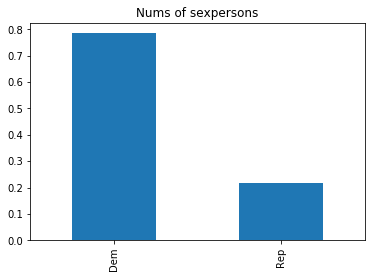

In [14]:
# 看dataframe 中标签的分布，把指标压缩到0-1之间
data.Party.value_counts(normalize = True).plot(kind = 'bar',
                                           title = 'Nums of sexpersons')

# 构造几个决策树

In [15]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [16]:
def print_graph(clf,feature_names):
    """ print decision tree"""
    graph = export_graphviz(clf,
                            label = "root",
                            proportion = True,
                            impurity = False,
                            out_file = None,
                           feature_names = feature_names,
                           class_names = {0:'f',1:'m'},
                           filled = True,
                           rounded = True
                           )
    graph = pydotplus.praph_from_dot_data(graph)
    return Image(graph.create_png())

In [17]:
t1 = DecisionTreeClassifier(max_depth = 1,random_state = seed)
t1.fit(xtrain,ytrain)
p = t1.predict_proba(xtest)[:,1]

print("Decision tree ROC-AUC score ： %.3f" % roc_auc_score(ytest,p))
print_graph(t1,xtrain.columns)

NameError: name 'xtrain' is not defined

In [18]:
t1 = DecisionTreeClassifier(max_depth = 3,random_state = seed)
t1.fit(xtrain,ytrain)
p = t1.predict_proba(xtest)[:,1]

print("Decision tree ROC-AUC score ： %.3f" % roc_auc_score(ytest,p))
print_graph(t1,atrain.columns)

NameError: name 'xtrain' is not defined